In [2]:
import numpy as np
import os
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
#set the dataset path
data_dir = "/kaggle/input/identifying-disease-in-tea-leafs/tea sickness dataset"


In [4]:
training_set = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 885 files belonging to 8 classes.
Using 708 files for training.


In [5]:
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 885 files belonging to 8 classes.
Using 177 files for validation.


In [6]:
print(training_set.class_names)  # Displays all the class names
print(len(training_set.class_names))  # Prints the number of classes


['Anthracnose', 'algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot']
8


In [7]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.models import Sequential

In [8]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting


#Output Layer
cnn.add(tf.keras.layers.Dense(units=8,activation='softmax'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [10]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │          12,008 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,797,732 (29.75 MB)

 Trainable params: 7,797,732 (29.75 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# -------------------- Training --------------------
# Add EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

tea_history = cnn.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=10,
    callbacks=[early_stopping]
)

#training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 36s 960ms/step - accuracy: 0.1330 - loss: 2.3069 - val_accuracy: 0.3333 - val_loss: 1.5894
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 489ms/step - accuracy: 0.3689 - loss: 1.4910 - val_accuracy: 0.3616 - val_loss: 1.2519
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 500ms/step - accuracy: 0.4391 - loss: 1.2303 - val_accuracy: 0.5650 - val_loss: 1.0274
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 494ms/step - accuracy: 0.5020 - loss: 1.1177 - val_accuracy: 0.5537 - val_loss: 0.9626
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 519ms/step - accuracy: 0.5306 - loss: 1.0269 - val_accuracy: 0.6215 - val_loss: 0.9627
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 483ms/step - accuracy: 0.6104 - loss: 0.9097 - val_accuracy: 0.5763 - val_loss: 0.9975
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 486ms/step - accuracy: 0.6393 - loss: 0.8680 - val_accuracy: 0.6102 - val_loss: 0.8847
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 504ms/step - accuracy: 0.6567 - loss: 0.7717 - val_accu

In [12]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 430ms/step - accuracy: 0.8187 - loss: 0.4470
Training accuracy: 0.8333333134651184


In [13]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 437ms/step - accuracy: 0.6923 - loss: 0.6711
Validation accuracy: 0.6553672552108765


In [14]:
# Get class names
class_names = training_set.class_names
n_classes = len(class_names)
print(f"Number of Classes: {n_classes}, Class Names: {class_names}")


Number of Classes: 8, Class Names: ['Anthracnose', 'algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot']


In [33]:
cnn.save('/kaggle/working/tea_model.keras')

In [34]:
tea_history.history #Return Dictionary of history

{'accuracy': [0.20056496560573578,
  0.36581921577453613,
  0.4759886860847473,
  0.5296609997749329,
  0.5564971566200256,
  0.6384180784225464,
  0.6115819215774536,
  0.6680790781974792,
  0.7274011373519897,
  0.7612994313240051],
 'loss': [2.0482144355773926,
  1.437688946723938,
  1.164608359336853,
  1.0614045858383179,
  0.9964478015899658,
  0.8651573061943054,
  0.893803060054779,
  0.7699400186538696,
  0.6710370182991028,
  0.5673296451568604],
 'val_accuracy': [0.3333333432674408,
  0.3615819215774536,
  0.5649717450141907,
  0.5536723136901855,
  0.6214689016342163,
  0.5762711763381958,
  0.6101694703102112,
  0.6723163723945618,
  0.700564980506897,
  0.6553672552108765],
 'val_loss': [1.5893523693084717,
  1.2519484758377075,
  1.027431845664978,
  0.9625505208969116,
  0.962708055973053,
  0.9975304007530212,
  0.8846883773803711,
  0.7979548573493958,
  0.7165662050247192,
  0.6987650394439697]}

In [35]:
import json
with open('/kaggle/working/tea_model.json','w') as f:
  json.dump(tea_history.history,f)

In [36]:
print(tea_history.history.keys()) 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


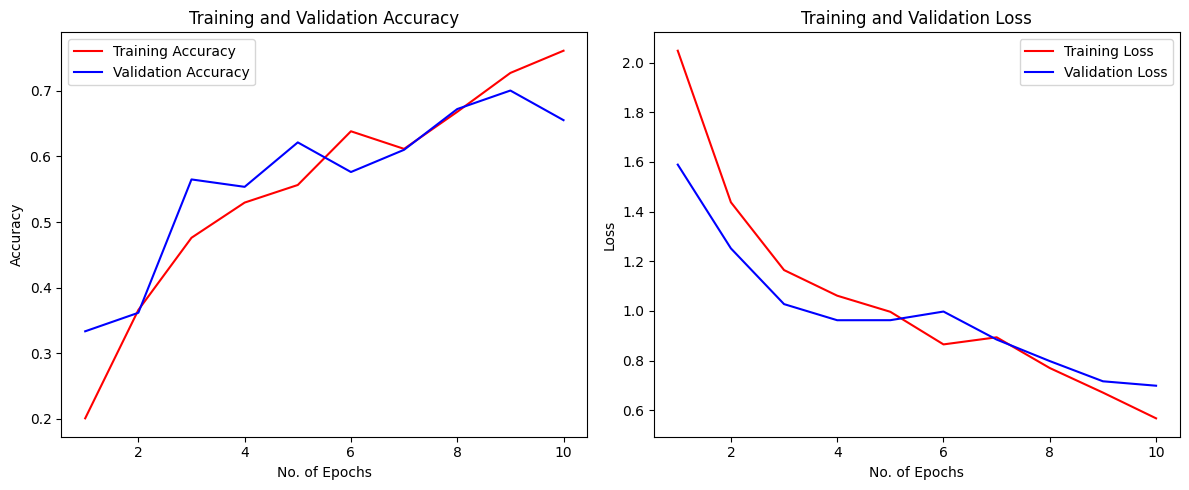

In [37]:
import matplotlib.pyplot as plt

epochs = range(1, 11)  # Now we have 10 epochs

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting training and validation accuracy on the first subplot
axes[0].plot(epochs, tea_history.history['accuracy'], color='red', label='Training Accuracy')
axes[0].plot(epochs, tea_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
axes[0].set_xlabel('No. of Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].legend()

# Plotting training and validation loss on the second subplot
axes[1].plot(epochs, tea_history.history['loss'], color='red', label='Training Loss')
axes[1].plot(epochs, tea_history.history['val_loss'], color='blue', label='Validation Loss')
axes[1].set_xlabel('No. of Epochs')
axes[1].set_ylabel('Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [38]:
test_set = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 885 files belonging to 8 classes.
Using 177 files for validation.


In [39]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [40]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [41]:
Y_true


<tf.Tensor: shape=(177,), dtype=int64, numpy=
array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7])>

In [42]:
predicted_categories

<tf.Tensor: shape=(177,), dtype=int64, numpy=
array([6, 6, 7, 6, 6, 6, 7, 6, 6, 6, 7, 6, 3, 6, 3, 6, 6, 6, 7, 6, 6, 6,
       3, 3, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 3, 7, 7, 7, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 7, 3, 7, 7, 7,
       7, 3, 7, 7, 7, 7, 7, 7, 3, 7, 7, 7, 7, 7, 3, 7, 7, 3, 3, 3, 3, 3,
       3])>

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [32]:
cnn.save('/kaggle/working/tea_model.h5')